# Convolution Neural Network using Transfer Learning  
by Srinivas Prudhvi Somisetty(122021601001)

# Import block
here we are importting variouslibraries and packages required <br>
**tensorflow** for basic functions of model training and performance measure calculation <br> **keras** for model building <br>
we are also importing **sequential model api** from keras as we will build the model layer by layer as it is straight forward with one input and one output for each layer 
<br>**matplotlib.pyplot** for visualising the dataset as it is comprised of images<br> **numpy** for array operations

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from matplotlib import pyplot
import numpy as np

physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Dataset load
Here we are using CIFAR-10 dataset <br>
The **CIFAR-10** dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.<br>
we are using **keras.datasets** module to direct load the dataset from the api to our local variables <br>
The shape of a single record is 32px(H) X 32px(W) with 3 channels(RGB) this is a multidimensional array

In [51]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print("training set:",x_train.shape,"\ntest set:",x_test.shape)

training set: (50000, 32, 32, 3) 
test set: (10000, 32, 32, 3)


#Categorical conversion
The dataset is divided into five training batches and one test batch, each with 10000 images.<br>
There are 10 classes in the data set and the we are changing the class valriable into a categorical variable using keras builtin function for the model to train easier.

In [52]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

Creating the label variable with the names of the class for the the images present in the dataset. <br>
There are 10 distinct classes.

In [53]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Initial ploting of the dataset
we are using the imshow function in the matplotlib.pyplot module to print the images from the dataset to get a basic idea how the images are present 

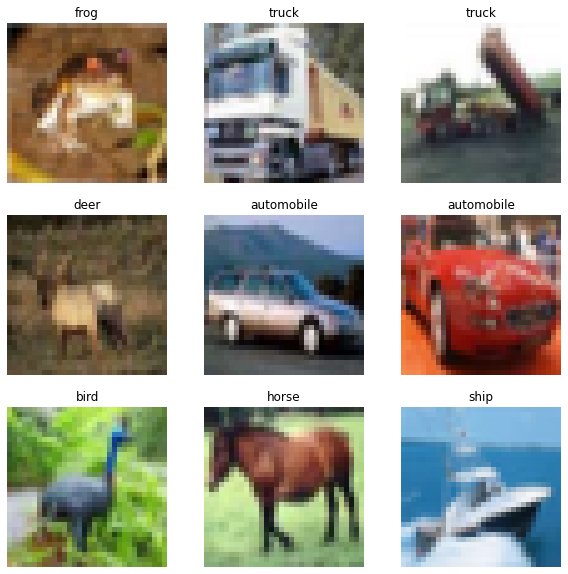

In [45]:
pyplot.figure(figsize=(10, 10))
for i in range(9):
    ax = pyplot.subplot(3, 3, i + 1)
    pyplot.imshow(tf.squeeze(x_train[i]))
    pyplot.title(labels[np.where(y_train[i]==1)[0][0]])
    pyplot.axis("off")

#Reshaping the train & test data
The Convolution2D layers in Keras however, are designed to work with 3 dimensions per example. They have 4-dimensional inputs and outputs. This covers colour images **(n_samples, width, height, n_channels)**, but more importantly, it covers deeper layers of the network, where each example has become a set of feature maps i.e. (n_samples, width, height, n_channels). we are making sure all the data is in uniform share as it is a good practice to make sure we check and reshape the data before making any changes to it 

In [46]:
x_train = np.array(x_train).reshape(x_train.shape[0], 32, 32, 3)
x_test = np.array(x_test).reshape(x_test.shape[0], 32, 32, 3)

#Normalization
Here we are using 0-1  normalization<br>
Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1.

It is valid for images to have pixel values in the range 0-1 and images can be viewed normally.

This can be achieved by dividing all pixels values by the largest pixel value; that is 255. This is performed across all channels, regardless of the actual range of pixel values that are present in the image.


In [47]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

x_train.shape

(50000, 32, 32, 3)

#Plot after performing normalization
We can see there is no significant change in the image when plotted but the weights of the each pixel is drastically reduced making it very light weight to perform calculations.

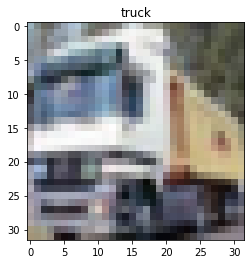

In [48]:
pyplot.imshow(  tf.squeeze(x_train[1]) )
pyplot.title(labels[np.where(y_train[1]==1)[0][0]])
pyplot.show()

# Transfer Learning
Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task.<br>
It is a popular approach in deep learning where pre-trained models are used as the starting point on computer vision and natural language processing tasks given the vast compute and time resources required to develop neural network models on these problems and from the huge jumps in skill that they provide on related problems.

#Resnet50
Here we are using **resnet50** as the base model and using it with previous knowlegde gained from the training of **Imagenet**<br>

ResNet-50 is a convolutional neural network that is 50 layers deep. It is pretrained on more than a million images from the ImageNet database . The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. <br> 
So it is a valid choice for using on CIFAR-10 dataset. <br>
***an important point to remember is:->***<br>
**input_shape:** optional shape tuple, only to be specified if include_top is False (otherwise the input shape has to be (224, 224, 3) (with 'channels_last' data format) or (3, 224, 224) (with 'channels_first' data format). It should have exactly 3 inputs channels, and width and height should be no smaller than 32. E.g. (200, 200, 3) would be one valid value.<br><br>
**The 50 layers of the resnet50 are printed below.**



In [57]:
resnet = tf.keras.applications.ResNet50(include_top=False, weights='imagenet')

print()
for layer in resnet.layers:
  print(layer.name)


input_2
conv1_pad
conv1_conv
conv1_bn
conv1_relu
pool1_pad
pool1_pool
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_conv
conv2_block1_2_bn
conv2_block1_2_relu
conv2_block1_0_conv
conv2_block1_3_conv
conv2_block1_0_bn
conv2_block1_3_bn
conv2_block1_add
conv2_block1_out
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_conv
conv2_block2_2_bn
conv2_block2_2_relu
conv2_block2_3_conv
conv2_block2_3_bn
conv2_block2_add
conv2_block2_out
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_conv
conv2_block3_2_bn
conv2_block3_2_relu
conv2_block3_3_conv
conv2_block3_3_bn
conv2_block3_add
conv2_block3_out
conv3_block1_1_conv
conv3_block1_1_bn
conv3_block1_1_relu
conv3_block1_2_conv
conv3_block1_2_bn
conv3_block1_2_relu
conv3_block1_0_conv
conv3_block1_3_conv
conv3_block1_0_bn
conv3_block1_3_bn
conv3_block1_add
conv3_block1_out
conv3_block2_1_conv
conv3_block2_1_bn
conv3_block2_1_relu
conv3_block2_2_conv
conv3_block2_2_bn
conv3

#Building the model

Here we are building the main model by calling the resnet model from keras library into our sequential model.<br>
1. first we initilize our model with the sequential api from the keras library.<br><br>
2. then we call the resnet model into our model as the top portion and we also give some arguments as follows<br>
3. **input_shape=(32,32,3)** Here we are mentioning the input shape of the model as per the shape of the image samples present in the dataset.<br>
4. **include_top=False:** When loading a given model, the “**include_top**” argument can be set to False, in which case the fully-connected output layers of the model used to make predictions is not loaded, allowing a new output layer to be added and trained(in other words we are removing the output layer of the resnet as we are creating out own output layers in this perticular model).<br>
5. **weights='imagenet'** This is to mention the model to get the weights obtained from the training process of imagenet dataset<br><br>
6. a flattern layer is used to convert the present multidimentsion data flowing through the model into a single dimension as in the futher layers of the model we just perform basic classification operations it is easier.<br><br>
7. we are using a dense layer with 128 neurons to reduce the dimenion of the layer as we are progressing in the classification and we are using the relu activation function for a simpler estimation of the calculation<br><br>
8. again we are using a dense layer but with only 10 neurons to futher decrease the dimension and here we are using softmax activation function as it is best suited for multi class classification  



<br>

we are compiling the model and initilizing it with optimizer, loss function and metrics
<br><br>
**optimizer** : we are using Adam optimizer with learning rate of 0.0001. It basically says the model at what pace it should update itself while training
<br>
**loss function**:  we are using Cross-entropy as a loss function for a multi-class classification task.
<br>
**metrics**: we  are using accuracy as the metrics for the model. the use of this is to train and update the model based on the accuracy at the end of each epoch.



In [10]:
model = Sequential()

model.add(keras.applications.resnet50.ResNet50(input_shape = (32,32,3),
                                               include_top = False,
                                               weights = 'imagenet'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10,activation= 'softmax'))
model.compile(optimizer=keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

94773248/94765736 [==============================] - 1s 0us/step


we are using model summary to get the basic idea of the layers of the model present and how it is distributed and also how many parameters are present in the model out of which are trainable.


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 23,851,274
Trainable params: 23,798,154
Non-trainable params: 53,120
_________________________________________________________________


# Freezing layers
Freezing (by setting layer.trainable = False) prevents the weights in a given layer from being updated during training.<br>
by doing so we can get the same performace out of the model when it was pretrained 

In [58]:
model.trainable=False

#Training the model
Here we are trining the model with the training data and the arguments used are as follows<br>
**x,y**: the training data<br>
**batch_size**: this is to specify the number of sample  to go through before updating the gradient each time(no. of samples per gradient update)<br>
**epochs**:it is used to define the number of time the model needs to train on the entine data provided each time <br>
**validation_split**:a part of data is set aside while training and used to evaluate the performance and loss of the training process of the model

In [59]:
history = model.fit(x_train, y_train, batch_size=128, epochs=5,validation_split=0.33)

Epoch 1/5
262/262 [==============================] - 23s 79ms/step - loss: 0.1407 - accuracy: 0.9542 - val_loss: 1.0792 - val_accuracy: 0.7207
Epoch 2/5
262/262 [==============================] - 20s 76ms/step - loss: 0.1166 - accuracy: 0.9610 - val_loss: 1.0738 - val_accuracy: 0.7368
Epoch 3/5
262/262 [==============================] - 20s 77ms/step - loss: 0.1025 - accuracy: 0.9664 - val_loss: 1.1325 - val_accuracy: 0.7348
Epoch 4/5
262/262 [==============================] - 20s 78ms/step - loss: 0.0901 - accuracy: 0.9689 - val_loss: 1.1328 - val_accuracy: 0.7406
Epoch 5/5
262/262 [==============================] - 20s 78ms/step - loss: 0.0784 - accuracy: 0.9742 - val_loss: 1.1655 - val_accuracy: 0.7458


# Plot Training performance

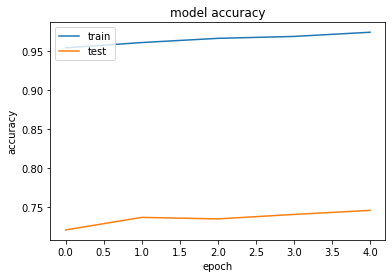

In [60]:
history.history
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.show()
# summarize history for loss


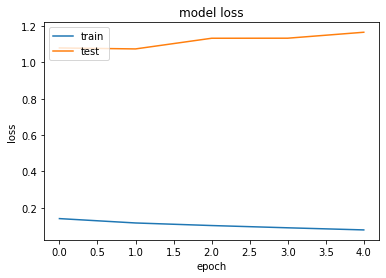

In [61]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.show()

# Evaluation
evaluate method is used to check the trained model how it is performing on unseen data and calculate the metrics of the performance

In [62]:
score = model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.2131 - accuracy: 0.7422


In [63]:
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

Test loss: 1.213059902191162
Test accuracy: 0.7422000169754028


# Prediction
this method is used to predict a single sample or in batched and  mainly used in the production level or end user level.

In [64]:
prediction = model.predict(x_test)

# Plot Prediction

prediction


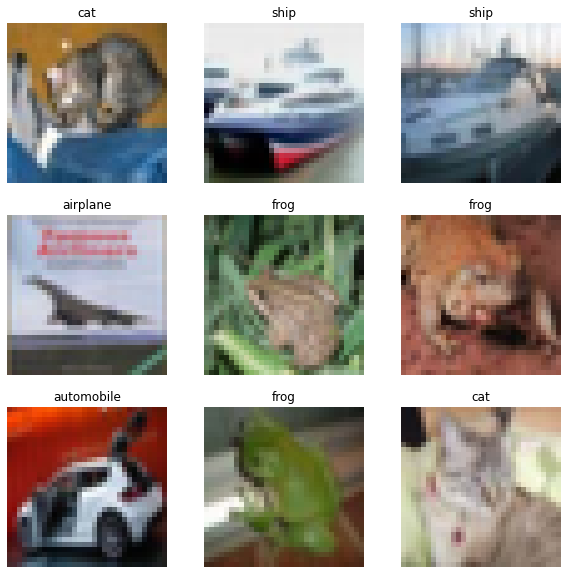

In [65]:
print("prediction")
pyplot.figure(figsize=(10, 10))
for i in range(9):
    ax = pyplot.subplot(3, 3, i + 1)
    pyplot.imshow(tf.squeeze(x_test[i]))
    pyplot.title(labels[np.argmax(prediction[i])])
    pyplot.axis("off")
  



---



#Batch Normalization
s a method used to make artificial neural networks faster and more stable through normalization of the layers' inputs by re-centering and re-scaling.<br>
In a neural network, batch normalization is achieved through a normalization step that fixes the means and variances of each layer's inputs. Ideally, the normalization would be conducted over the entire training set, but to use this step jointly with stochastic optimization methods, it is impractical to use the global information. Thus, normalization is restrained to each mini-batch in the training process.<br>
Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.

#CNN vs ANN 


Category|CNN|ANN      
-----|----|--- 
**data **|Image|Tabulular
**Parameter Sharing**|Yea|No
**Spatial Relationship**|Yes|No
**vanashing & epxploding gradient**|Yes|Yes


